## Name: Akshay Gudelli


# GRIP- Sparks Foundation
###  Task 2: Prediction Using Unsupervised Machine Learning


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r'Iris.csv')
df1=df.drop(['Id','Species'],axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1.shape

(150, 4)

## Finding Null Values

In [5]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

## Checking Which Column Has Outliers

In [6]:
for column in df1.columns:
    mean=np.mean(df1[column])
    sd=np.std(df1[column])
    if(len(df1[df1[column]> mean+3*sd])>0):
        print(column)

SepalWidthCm


In [7]:
df1[df1['SepalLengthCm']>np.mean(df1['SepalWidthCm'])+3*np.std(df1['SepalWidthCm'])]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df1.drop(131,axis=0,inplace=True)

In [9]:
df1.shape

(149, 4)

## Finding Correlation between Independent Variables

In [10]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.142649,0.871471,0.820614
SepalWidthCm,-0.142649,1.000000,-0.445751,-0.373889
PetalLengthCm,0.871471,-0.445751,1.000000,0.963022
PetalWidthCm,0.820614,-0.373889,0.963022,1.000000


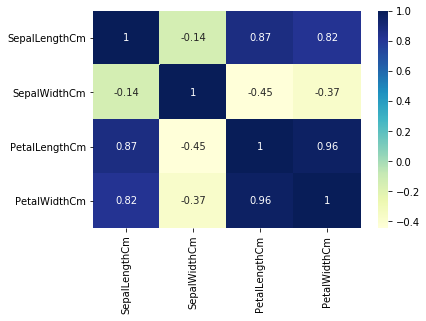

In [11]:
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

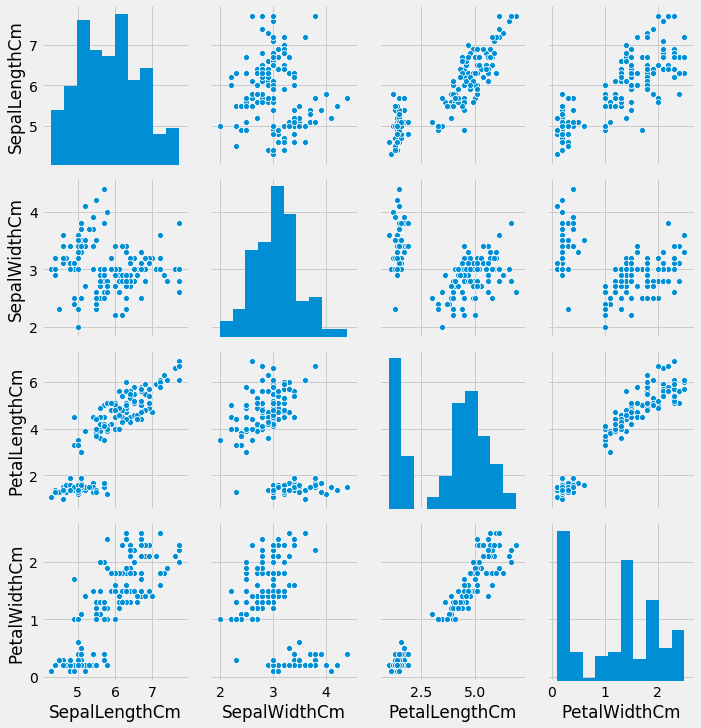

In [12]:
plt.style.use("fivethirtyeight")
sns.pairplot(df1)

### Scaling the features using MinMaxScaler

In [13]:
from sklearn.cluster import KMeans
scaler=MinMaxScaler()
for i in df1.columns:
    df1[i]=scaler.fit_transform(df1[[i]])

In [14]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.235294,0.625000,0.067797,0.041667
1,0.176471,0.416667,0.067797,0.041667
2,0.117647,0.500000,0.050847,0.041667
3,0.088235,0.458333,0.084746,0.041667
4,0.205882,0.666667,0.067797,0.041667


## To determine the value of k in k-means algorithm we use elbow method

In [15]:
sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

## Sum of squared error for k values ranging from 1-10

In [16]:
sse

[41.313280444050505,
 12.138393557237384,
 7.05167904315568,
 5.5663654030450225,
 4.583390275567201,
 3.9756764990385944,
 3.4972304155789193,
 3.11622700299923,
 2.7956405255359336,
 2.516705662078582]

## The appropriate k value is the one where the change in SSE is minimum when number of clusters increases. Here it is 3

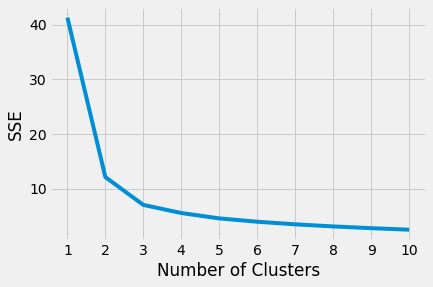

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Applying K-Means to the dataset

In [18]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
y_kmeans=kmeans.predict(df1)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Merging the predicted values to the dataset

In [20]:
df1['cluster']=y_kmeans
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,0.235294,0.625000,0.067797,0.041667,0
1,0.176471,0.416667,0.067797,0.041667,0
2,0.117647,0.500000,0.050847,0.041667,0
3,0.088235,0.458333,0.084746,0.041667,0
4,0.205882,0.666667,0.067797,0.041667,0


## Visualzing the dataset

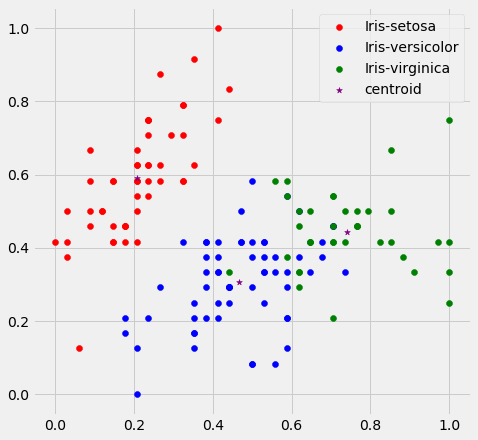

In [21]:
df1_0=df1[df1['cluster']==0]
df1_1=df1[df1['cluster']==1]
df1_2=df1[df1['cluster']==2]
plt.style.use("fivethirtyeight")
plt.figure(figsize=[7,7])
plt.scatter(df1_0['SepalLengthCm'],df1_0['SepalWidthCm'],c = 'red', label = 'Iris-setosa')
plt.scatter(df1_1['SepalLengthCm'],df1_1['SepalWidthCm'],c = 'blue', label = 'Iris-versicolor')
plt.scatter(df1_2['SepalLengthCm'],df1_2['SepalWidthCm'],c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()